In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from google.colab import drive
import random
from sklearn.metrics import mean_squared_error
import time
from sklearn.model_selection import GridSearchCV
import pickle
import pdb

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_=pickle.load(fo, encoding='bytes')
    return dict_

In [4]:
### Preparing the training data

## concatanating all the different sets of data
dict_1 = unpickle('/content/drive/My Drive/COMP_551/A2/data_batch_1')
dict_2 = unpickle('/content/drive/My Drive/COMP_551/A2/data_batch_2')
dict_3 = unpickle('/content/drive/My Drive/COMP_551/A2/data_batch_3')
dict_4 = unpickle('/content/drive/My Drive/COMP_551/A2/data_batch_4')
dict_5 = unpickle('/content/drive/My Drive/COMP_551/A2/data_batch_5')
keys = list(dict_1.keys())
key = keys[2]
x_1 = dict_1[key]
y_1=dict_1[keys[1]]
x_2 = dict_2[key]
y_2=dict_2[keys[1]]
x_3 = dict_3[key]
y_3=dict_3[keys[1]]
x_4 = dict_4[key]
y_4=dict_4[keys[1]]
x_5 = dict_5[key]
y_5=dict_5[keys[1]]

images = [x_1, x_2, x_3, x_4, x_5]
labels = [y_1, y_2, y_3, y_4, y_5]
X_train = np.concatenate(images, axis=0)
y_train = np.concatenate(labels, axis=0)
## preprocessing
X_train = X_train - np.mean(X_train, axis=0) # centering
X_train = X_train/(np.std(X_train, axis=0)) # normallizing

### Preparing the test data

dict_test = unpickle('/content/drive/My Drive/COMP_551/A2/test_batch')
X_test = dict_test[key]
## preprocessing
X_test = X_test - np.mean(X_test, axis=0) # centering
X_test = X_test/(np.std(X_test, axis=0)) # normallizing

y_test = dict_test[keys[1]]


#how to load x and y?
x_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

x_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
batch_size = 32
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


#CNN created with pytorch:

(generated with chatgpt)

In [5]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(64 * 8 * 8 * 16, 256)
        self.relu3 = nn.ReLU()
        
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Pass input through the first convolutional layer followed by ReLU activation
        x = self.conv1(x)
        x = self.relu1(x)
        
        # Pass output of first layer through the second convolutional layer followed by ReLU activation
        x = self.conv2(x)
        x = self.relu2(x)
        
        # Flatten the output of the second convolutional layer
        x = x.view(-1, 64 * 8 * 8 * 16)
        
        # Pass flattened output through first fully connected layer followed by ReLU activation
        x = self.fc1(x)
        x = self.relu3(x)
        
        # Pass output of first fully connected layer through second fully connected layer followed by ReLU activation
        x = self.fc2(x)
        
        return x



Epoch 1, batch 100: loss=2.168
Epoch 1, batch 200: loss=1.912
Epoch 1, batch 300: loss=1.775
Epoch 1, batch 400: loss=1.718
Epoch 1, batch 500: loss=1.644
Epoch 1, batch 600: loss=1.585
Epoch 1, batch 700: loss=1.529
Epoch 1, batch 800: loss=1.485
Epoch 1, batch 900: loss=1.444
Epoch 1, batch 1000: loss=1.448
Epoch 1, batch 1100: loss=1.399
Epoch 1, batch 1200: loss=1.381
Epoch 1, batch 1300: loss=1.347
Epoch 1, batch 1400: loss=1.325
Epoch 1, batch 1500: loss=1.336
Epoch 2, batch 100: loss=1.242
Epoch 2, batch 200: loss=1.262
Epoch 2, batch 300: loss=1.234
Epoch 2, batch 400: loss=1.224
Epoch 2, batch 500: loss=1.233
Epoch 2, batch 600: loss=1.202
Epoch 2, batch 700: loss=1.215
Epoch 2, batch 800: loss=1.183
Epoch 2, batch 900: loss=1.182
Epoch 2, batch 1000: loss=1.165
Epoch 2, batch 1100: loss=1.164
Epoch 2, batch 1200: loss=1.148
Epoch 2, batch 1300: loss=1.153
Epoch 2, batch 1400: loss=1.139
Epoch 2, batch 1500: loss=1.117
Epoch 3, batch 100: loss=1.044
Epoch 3, batch 200: loss=1.

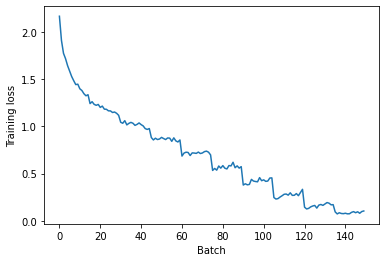

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the hyperparameters
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Create an instance of the model
import matplotlib.pyplot as plt

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

train_losses = []
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        labels = labels.to(torch.long)
        optimizer.zero_grad()
        inputs = inputs.view(-1, 3, 32, 32)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 100 == 99:
            print(f'Epoch {epoch+1}, batch {i+1}: loss={running_loss/100:.3f}')
            train_losses.append(running_loss/100)
            running_loss = 0.0

# Plot the loss
plt.plot(train_losses)
plt.xlabel('Batch')
plt.ylabel('Training loss')
plt.show()


#y u not working

In [7]:
# Set the model to evaluation mode
net.eval()

X_test = torch.from_numpy(X_test).float()
X_test = X_test.reshape(-1, 3, 32, 32)
#y_test = torch.from_numpy(y_test)

# Make predictions on new data
with torch.no_grad():
    y_pred = net(X_test)

# Convert the predicted probabilities to class labels
_, predicted_labels = torch.max(y_pred, 1)

# Compute the accuracy on the test set
correct_predictions = torch.sum(predicted_labels == torch.Tensor(y_test).long())
accuracy = correct_predictions.item() / len(y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6738
